### 주가정보 획득
* 마케팅 포인트와 주가와의 상관관계 분석을 위한 주가 획득
* 유통주 위주의 주가분석
* 현대백화점(069960)  
 - https://finance.naver.com/item/sise_day.nhn?code=069960&page=1

In [2]:
import sqlite3 
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname=fm.FontProperties(fname='malgun.ttf').get_name()
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec # 박스플롯하기 위한 패키지 

In [3]:
# 함수 선언부 url 을 매개변수화
def stockGet(url=''):    
    # url 가져와서 파싱
    src=requests.get(url)
    result=src.content.strip()
    html=bs(result,'html.parser')
    tgts=html.select('table.type2 tr')
    #len(tgt)
    res=[]
    #tgts 가 16개 씩 나옴 1 page
    for tgt in tgts:
        if(tgt.select('td .p10')):# 날짜 없는 줄은 제거
            sday=tgt.select('td .p10')[0].text.replace(".","")

            endp=tgt.select('td.num')[0].text.replace(",","")
            startp=tgt.select('td.num')[2].text.replace(",","")
            maxp=tgt.select('td.num')[3].text.replace(",","")
            minp=tgt.select('td.num')[4].text.replace(",","")
            vol=tgt.select('td.num')[5].text.replace(",","")
            res.append((sday,startp,maxp,minp,endp,vol))
    # 10개 반환
    return res

In [4]:
def addData(data):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql = 'insert into StockDay \
        (SIDX,SCODE,SCOMP,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL) \
        values (?,?,?,?,?,?,?,?,?)'
        ##### data=[1001,60000,' 신세계','20200830',30,60,70,50,250]
        cur.execute(sql,data)
        conn.commit()
        cur.close()
    

In [5]:
dbname='C:/Users/이상은/Desktop/NaverStock.db'
def selData(whr=' where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SIDX from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [6]:
urlsrc='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
sCode='069960';
sComp='현대백화점'
for i in range(1,100):
    print("#"*30)
    url=urlsrc.format(sCode,i)
    print(url)
    # 데이터 10개 가져오기
    rs=stockGet(url)
    
    for r in rs:
        #데이터별 고유코드만들기
        sidx=r[0]+sCode
        ##### data=[1001,60000,' 신세계','20200830',30,60,70,50,250]
        data=[sidx,sCode,sComp,r[0],r[1],r[2],r[3],r[4],r[5]]
        #데이터 입력하기 중복데이터 확인
        preData=selData(' where SIDX='+sidx)
        if(preData):
            print("중복데이터 입니다.",preData)
        else:
            #print(r)
            addData(data)

##############################
https://finance.naver.com/item/sise_day.nhn?code=069960&page=1
중복데이터 입니다. [(20200917069960,)]
중복데이터 입니다. [(20200916069960,)]
중복데이터 입니다. [(20200915069960,)]
중복데이터 입니다. [(20200914069960,)]
중복데이터 입니다. [(20200911069960,)]
중복데이터 입니다. [(20200910069960,)]
중복데이터 입니다. [(20200909069960,)]
중복데이터 입니다. [(20200908069960,)]
중복데이터 입니다. [(20200907069960,)]
##############################
https://finance.naver.com/item/sise_day.nhn?code=069960&page=2
중복데이터 입니다. [(20200904069960,)]
중복데이터 입니다. [(20200903069960,)]
중복데이터 입니다. [(20200902069960,)]
중복데이터 입니다. [(20200901069960,)]
중복데이터 입니다. [(20200831069960,)]
중복데이터 입니다. [(20200828069960,)]
중복데이터 입니다. [(20200827069960,)]
중복데이터 입니다. [(20200826069960,)]
중복데이터 입니다. [(20200825069960,)]
중복데이터 입니다. [(20200824069960,)]
##############################
https://finance.naver.com/item/sise_day.nhn?code=069960&page=3
중복데이터 입니다. [(20200821069960,)]
중복데이터 입니다. [(20200820069960,)]
중복데이터 입니다. [(20200819069960,)]
중복데이터 입니다. [(20200818069960,)]
중복데이터

In [125]:
selData() #이렇게 표시되어도 오류가 아님! sqlite 테이블에 들어갔을 가능성이 높기 
# 때문에 테이블부터 확인하기 !!

[]

### 다른 기업들도 데이터베이스에 추가하기 

In [95]:
compList=[
    ("CJ ENM", "035760"),
    ("영원무역","111770"),
    ("SK네트웍스","001740"),
    ("신세계인터내셔널","031430"),
    ]

In [99]:
def MyCrawl(comp=('CJ ENM','035760'),sp=1,ep=2):
    sCode=comp[1]
    sComp=comp[0] 
    urlsrc='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
    for i in range(1,50):
        print("#"*30)
        url=urlsrc.format(sCode,i)
        print(url)
        rs=stockGet(url)
        #10개 데이터 추출
        for r in rs:
            #데이터별 고유코드만들기
            sidx=r[0]+sCode
            ##### data=[1001,60000,' 신세계','20200830',30,60,70,50,250]
            data=[sidx,sCode,sComp,r[0],r[1],r[2],r[3],r[4],r[5]]
            #데이터 입력하기 중복데이터 확인
            preData=selData(' where SIDX='+sidx)
            if(preData):
                print("중복데이터 입니다.",preData)
            else:
                #print(r)
                addData(data)

In [100]:
MyCrawl(compList[0],1,2)

##############################
https://finance.naver.com/item/sise_day.nhn?code=035760&page=1
중복데이터 입니다. [(20200918035760,)]
중복데이터 입니다. [(20200917035760,)]
중복데이터 입니다. [(20200916035760,)]
중복데이터 입니다. [(20200915035760,)]
중복데이터 입니다. [(20200914035760,)]
중복데이터 입니다. [(20200911035760,)]
중복데이터 입니다. [(20200910035760,)]
중복데이터 입니다. [(20200909035760,)]
중복데이터 입니다. [(20200908035760,)]
중복데이터 입니다. [(20200907035760,)]
##############################
https://finance.naver.com/item/sise_day.nhn?code=035760&page=2
중복데이터 입니다. [(20200904035760,)]
중복데이터 입니다. [(20200903035760,)]
중복데이터 입니다. [(20200902035760,)]
중복데이터 입니다. [(20200901035760,)]
중복데이터 입니다. [(20200831035760,)]
중복데이터 입니다. [(20200828035760,)]
중복데이터 입니다. [(20200827035760,)]
중복데이터 입니다. [(20200826035760,)]
중복데이터 입니다. [(20200825035760,)]
중복데이터 입니다. [(20200824035760,)]
##############################
https://finance.naver.com/item/sise_day.nhn?code=035760&page=3
중복데이터 입니다. [(20200821035760,)]
중복데이터 입니다. [(20200820035760,)]
중복데이터 입니다. [(20200819035760,)]
중복데이터

In [101]:
selData()

[]

### 기업 A 데이터셋 가져옴

In [102]:
dbname='C:/Users/이상은/Desktop/NaverStock.db'
def selData2(whr2=' where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql2='select SCODE, SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL from StockDay'+whr2
        cur.execute(sql2)
        rows2=cur.fetchall()
        cur.close()
    return rows2

In [103]:
whr2=' where SDAY > 20200101 and SCODE="069960" order by SDAY  asc limit 250'
# where 앞에 한 칸 띄어야 에러 안 남 
res=selData2(whr2)
cols=['SCODE', 'SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
dfgs=pd.DataFrame(data=res,columns=cols)
dfgs.head()

,SCODE,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,069960,20200102,82900,87200,81800,85900,114989
1,069960,20200103,85900,86500,83900,85600,95600
2,069960,20200106,84400,85600,83300,84000,68657
3,069960,20200107,84300,89900,84100,88900,183531
4,069960,20200108,87800,89400,86500,87300,105155


### 기업 B 데이터셋 가져옴 

In [104]:
whr2=' where SDAY > 20200101 and SCODE="111770" order by SDAY  asc limit 250'
# where 앞에 한 칸 띄어야 에러 안 남 
res=selData2(whr2)
cols=['SCODE','SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
df=pd.DataFrame(data=res,columns=cols)
df.tail()

,SCODE,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
175,111770,20200914,30650,31400,30500,31100,104756
176,111770,20200915,30850,31150,30550,30950,114422
177,111770,20200916,30600,30900,30100,30200,124397
178,111770,20200917,30350,30350,29400,30100,124240
179,111770,20200918,30100,30150,29450,29500,97404


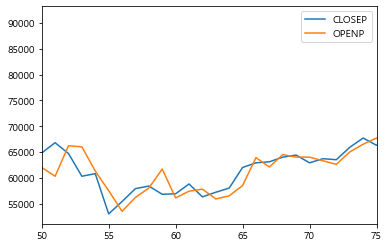

In [105]:
# 기업A 시각화
sels2=['CLOSEP','OPENP']
dfgs[sels2].plot()
plt.xlim(50,75)
# plt.ylim(50000,70000)
plt.show()

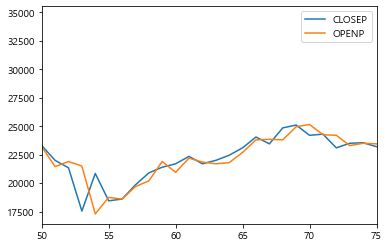

In [106]:
# 기업B 시각화
sels=['CLOSEP','OPENP']
df[sels].plot()
plt.xlim(50,75)
# plt.ylim(50000,70000)
plt.show()

# 이동평균선
* 주가 기술분석
* 단기 이평선(5일 이평선) 장기 이평선(30일 이평선)을 설정
* 장단기 이평선을 분석
* 골든크로스 (단기 이평선이 장기 이평선을 아래서 위로 통과)
* 데드크로스 (단기 이평선이 장기 이평선을 위에서 아래로 통과)
* 마케팅의 시장평가 지점을 지정

골든크로스 vs 데드크로스 개념정리
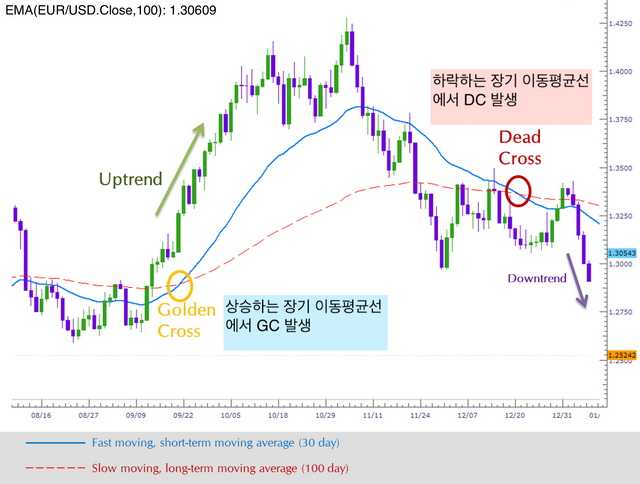

In [107]:
def makeMV(baseday=5,basedata=df['CLOSEP']):
    res=[]
    # 초기화 하기
    for i in range(baseday-1):
        res.append(0)
    # 이동평균 데이터 만들기
    n=len(basedata)-(baseday-1)
    print("총 데이터수:",len(basedata),"초기화 안되고 채워야할 부분:",n)
    for i in range(n):
        mvdata=np.average(basedata[i:i+baseday]) # 범위 지정(인덱싱)
        res.append(mvdata)
    return res


In [124]:
# 기업A VS 기업B 주가 위해 기업A ClOSEP(gsClose)를 기업B 데이터셋에 추가하기 
df['MV5']=makeMV(5)
df['MV30']=makeMV(30)
df['gsClose']=dfgs['CLOSEP']
df.sample(10)

총 데이터수: 180 초기화 안되고 채워야할 부분: 176
총 데이터수: 180 초기화 안되고 채워야할 부분: 151


,SCODE,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,gsClose,holdPos
130,111770,20200710,25550,25600,24400,24550,223127,25720.0,28620.000000,58700,-1
158,111770,20200820,26000,26200,24650,24700,242358,26310.0,25091.666667,58300,1
16,111770,20200128,30950,32500,30700,30950,183164,32790.0,0.000000,78200,0
156,111770,20200818,27200,27600,26300,26300,278779,26590.0,25138.333333,59900,1
142,111770,20200728,24650,25050,24500,24550,109867,24810.0,26038.333333,59600,-1
4,111770,20200108,32700,32900,32150,32450,124914,32870.0,0.000000,87300,0
90,111770,20200515,24650,24650,23850,24550,76593,24960.0,24388.333333,65100,1
37,111770,20200226,29600,31500,29150,30750,529459,29700.0,31196.666667,70800,-1
55,111770,20200323,18750,18900,17400,18450,147012,20040.0,27858.333333,53000,-1
39,111770,20200228,31550,31900,30700,31500,222301,30390.0,31106.666667,70900,-1


# 경쟁사 분석
* 동종 유사 주가의 경쟁사 분석을 통해 시장기준 주가 분석 (위에 기업 A VS 기업 B)

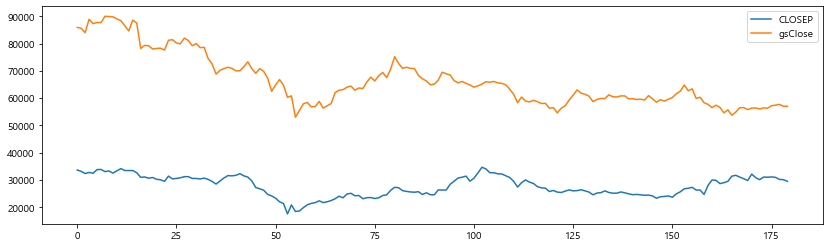

In [125]:
df[['CLOSEP','gsClose']].plot()
#plt.xlim(0,10)
#plt.ylim(150000,170000)
plt.legend()
plt.show()
# 기업A는 CLOSEP
# 기업B는 gsClose

### 장단기 크로스 포인트 분석
* 주가 장단기 이평선에 관한 크로스 포인트 분석
* 이를 통해 시장에 반영된 마케팅 기준선을 부여

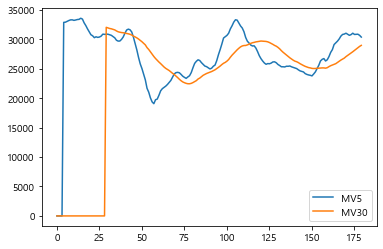

In [110]:
#기업 B의 장단기 주가 시각화 
df[['MV5','MV30']].plot()
#plt.xlim(0,10)
#plt.ylim(150000,170000)
plt.legend()
plt.show()

In [112]:
# MV5가 MV30보다 크면 1, MV30가 더 크면 -1, 한 달기간(30일)에 해당하는 날짜지만 
# 5, 30배수 아닌 날짜는 0으로 출력
short=df['MV5']
long=df['MV30']
res=[]
longday=30
for i in range(longday):
    res.append(0)
    
for i in range(longday,len(short)):
    if(short[i]>long[i]):
        res.append(1)
    else:
        res.append(-1)
df['holdPos']=res
df.sample(5)

,SCODE,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,gsClose,holdPos
143,111770,20200729,24400,24650,24200,24400,153291,24630.0,25851.666667,59300,-1
142,111770,20200728,24650,25050,24500,24550,109867,24810.0,26038.333333,59600,-1
155,111770,20200814,26950,27850,26100,27300,299685,26310.0,25131.666667,63400,1
128,111770,20200708,26550,26750,25850,26000,101899,26170.0,28956.666667,61400,-1
25,111770,20200210,30000,30750,30000,30550,65575,30380.0,0.000000,80200,0


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


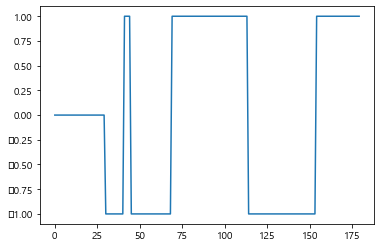

In [73]:
plt.plot(res)

#### 성장동력과 크로스포인트와의 관계
* 단기 성장성(성장비율)과 장단기 주가 모멘텀 분석
* 실질적 주가에 영향을 주는 마케팅 포인트 지점 획득

<ipython-input-113-d6d3f36f37c5>:4: RuntimeWarning: invalid value encountered in double_scalars
  c=((baseData[i]/baseData[i-1])-1)*20
<ipython-input-113-d6d3f36f37c5>:4: RuntimeWarning: divide by zero encountered in double_scalars
  c=((baseData[i]/baseData[i-1])-1)*20
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


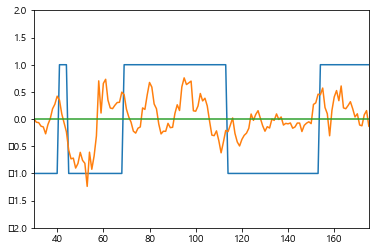

In [113]:
baseData=df['MV5']
res=[1]
for i in range(1,len(baseData)):
    c=((baseData[i]/baseData[i-1])-1)*20
    res.append(c)
df['holdPos'].plot()
plt.plot(res)
plt.plot([0,175],[0,0])
plt.xlim(30,175)
plt.ylim(-2,2)
plt.show()

### 캔들차트 분석
* 시가 고가 저가 종가 를 분석하여 마케팅의 적시적 효과를 보기 위함
* <img  src="candle.png"  />

In [75]:
#1.
!pip install mplfinance
#2.
!pip install mpl_finance
!pip install --upgrade mplfinance

'DOSKEY'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


'DOSKEY'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


'DOSKEY'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


Requirement already up-to-date: mplfinance in c:\anaconda3\lib\site-packages (0.12.7a0)


In [79]:
from mpl_finance import candlestick_ohlc

#### np.arange: return evenly spaced values within a given interval.
* parameter: numpy.arange([start, ]stop, [step, ]dtype=None)

In [81]:
#OPENP	HIGHP	LOWP	CLOSEP	VOL	
lMin=70
lMax=120
cols=['OPENP','HIGHP','LOWP','CLOSEP']
cdata=df[cols].values[lMin:lMax]
voldata=df['VOL'].values[lMin:lMax]
days=df['SDAY'].values[lMin:lMax]
gmv5=df['MV5'].values[lMin:lMax] # 5일 이평성
gmv30=df['MV30'].values[lMin:lMax] # 30일 이평선
xtic=np.arange(0,len(days),step=3) 
xdays=[days[i]-20000000 for i in xtic] #날짜에서 존재하지 않는 2000/00/00를 제외함
xdays

[200413,
 200417,
 200422,
 200427,
 200504,
 200508,
 200513,
 200518,
 200521,
 200526,
 200529,
 200603,
 200608,
 200611,
 200616,
 200619,
 200624]

#### matplotlib.gridspec.Gridspec
* parameter: matplotlib.gridspec.GridSpec(nrows, ncols, figure=None, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)

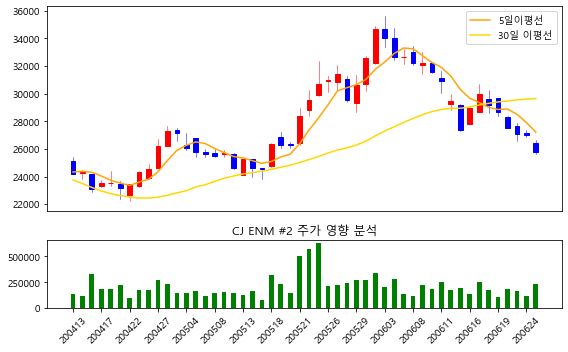

<Figure size 432x288 with 0 Axes>

In [94]:
# 그림비율
fig=plt.figure(figsize=(8,5))
# 그리드 2행 1열짜리 높이비율 3:1로 생성 
gs=gridspec.GridSpec(2,1,height_ratios=[3,1])
axis=[]
#축 선정
axis.append(plt.subplot(gs[0])) # gs[0] = 그래프1(candlestick)
# axis[0]을 그리드 공유
axis.append(plt.subplot(gs[1],sharex=axis[0])) # gs[1] = 그래프2(bargraph)
# 공유x축 표시 없애기
axis[0].get_xaxis().set_visible(False)
# 캔들스틱용 데이터 만들기
x=np.arange(len(cdata))
xa= np.reshape(x,(-1,1))
ohlc=np.hstack((xa,cdata))
#캔들스틱 그리기
candlestick_ohlc(axis[0], ohlc,width=0.5,colorup='r',colordown='b')
#거래량 그래프
axis[1].bar(x,voldata,color='g',width=0.5)
plt.title("CJ ENM #2 주가 영향 분석")
plt.xticks(xtic,xdays,rotation=45)
axis[0].plot(gmv5, color='orange', label="5일이평선")
axis[0].plot(gmv30, color='gold', label="30일 이평선")
axis[0].legend()
plt.tight_layout()
plt.show()
plt.savefig('cchart_cjenm.jpg')
plt.show()